# 🧩 Célula 1 — Importações e carregamento

In [4]:
# 🧠 Módulo 02 — Supervised Learning
# Dataset: cars_preprocessed.csv (versão com remainder__mpg)
# Autor: Ari Soares

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Configurações visuais
plt.style.use('seaborn-v0_8')
sns.set_theme(palette='deep')

# Carregar dataset pré-processado
df = pd.read_csv('/content/drive/MyDrive/05_Portfólio & CV [Ariel Pirangy]/2025/GitHub/cars_preprocessed.csv')

# Verificar colunas disponíveis
print("Colunas originais:\n", df.columns.tolist())

# Remover coluna duplicada (se existir)
if 'remainder__mpg' in df.columns:
    df.drop(columns=['remainder__mpg'], inplace=True)
    print("\n🧹 Coluna 'remainder__mpg' removida.")

# Exibir primeiras linhas
df.head()


Colunas originais:
 ['num__cubicinches', 'num__hp', 'num__weightlbs', 'num__time-to-60', 'cat__brand_ Japan.', 'cat__brand_ US.', 'remainder__mpg', 'remainder__cylinders', 'remainder__year', 'mpg']

🧹 Coluna 'remainder__mpg' removida.


,num__cubicinches,num__hp,num__weightlbs,num__time-to-60,cat__brand_ Japan.,cat__brand_ US.,remainder__cylinders,remainder__year,mpg
0,1.372393,1.450681,1.414997,-1.221287,0.0,1.0,8.0,1972.0,14.0
1,-1.030290,-0.874768,-1.280086,-0.532829,0.0,0.0,4.0,1980.0,31.9
2,0.930520,0.832210,0.518209,-1.565516,0.0,1.0,8.0,1971.0,17.0
3,1.832677,1.079598,0.886364,-1.909745,0.0,1.0,8.0,1971.0,15.0
4,-0.947439,-1.072679,-1.131408,0.499857,0.0,1.0,4.0,1978.0,30.5


# 🔍 Célula 2 — Análise rápida

In [5]:
# 2️⃣ Verificação de estrutura e correlação

print("Formato:", df.shape)
print("\nColunas:", df.columns.tolist())

# Estatísticas descritivas
display(df.describe().T)

# Correlação com mpg
corr = df.corr(numeric_only=True)['mpg'].sort_values(ascending=False)
print("\nCorrelação com mpg:\n", corr)


Formato: (261, 9)

Colunas: ['num__cubicinches', 'num__hp', 'num__weightlbs', 'num__time-to-60', 'cat__brand_ Japan.', 'cat__brand_ US.', 'remainder__cylinders', 'remainder__year', 'mpg']


,count,mean,std,min,25%,50%,75%,max
num__cubicinches,261.0,-1.459029e-16,1.001921,-1.223609,-0.919822,-0.413509,0.930520,2.338990
num__hp,261.0,1.276118e-16,1.001921,-1.493239,-0.775813,-0.281037,0.782732,3.058704
num__weightlbs,261.0,-1.650446e-16,1.001921,-1.648240,-0.891871,-0.124882,0.771906,2.344824
num__time-to-60,261.0,-2.109849e-16,1.001921,-2.598203,-0.532829,0.155628,0.499857,3.253689
cat__brand_ Japan.,261.0,1.954023e-01,0.397272,0.000000,0.000000,0.000000,0.000000,1.000000
cat__brand_ US.,261.0,6.206897e-01,0.486148,0.000000,0.000000,1.000000,1.000000,1.000000
remainder__cylinders,261.0,5.590038e+00,1.733310,3.000000,4.000000,6.000000,8.000000,8.000000
remainder__year,261.0,1.976820e+03,3.637696,1971.000000,1974.000000,1977.000000,1980.000000,1983.000000
mpg,261.0,2.314483e+01,7.823570,10.000000,16.900000,22.000000,28.800000,46.600000



Correlação com mpg:
 mpg                     1.000000
remainder__year         0.550441
num__time-to-60         0.509070
cat__brand_ Japan.      0.446372
cat__brand_ US.        -0.576570
num__hp                -0.774905
remainder__cylinders   -0.776710
num__cubicinches       -0.802379
num__weightlbs         -0.823800
Name: mpg, dtype: float64


# ⚙️ Célula 3 — Separação de variáveis

In [6]:
# 3️⃣ Separar variáveis preditoras e alvo

target = 'mpg'
X = df.drop(columns=[target])
y = df[target]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Treino:", X_train.shape)
print("Teste:", X_test.shape)

Treino: (208, 8)
Teste: (53, 8)


# 🤖 Célula 4 — Treinamento

In [7]:
# 4️⃣ Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercepto:", round(model.intercept_, 3))
print("\nCoeficientes (primeiros 10):")
for name, coef in zip(X.columns[:10], model.coef_[:10]):
    print(f"{name:30} {coef:10.3f}")

Intercepto: -1526.783

Coeficientes (primeiros 10):
num__cubicinches                    2.225
num__hp                            -0.314
num__weightlbs                     -5.478
num__time-to-60                     0.651
cat__brand_ Japan.                  0.276
cat__brand_ US.                    -2.701
remainder__cylinders               -0.494
remainder__year                     0.786


# 📊 Célula 5 — Avaliação

In [8]:
# 5️⃣ Avaliar desempenho no conjunto de teste
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² : {r2:.3f}")


MSE: 10.96
MAE: 2.49
R² : 0.824


# 🎨 Célula 6 — Visualização (Reais vs. Previstos)

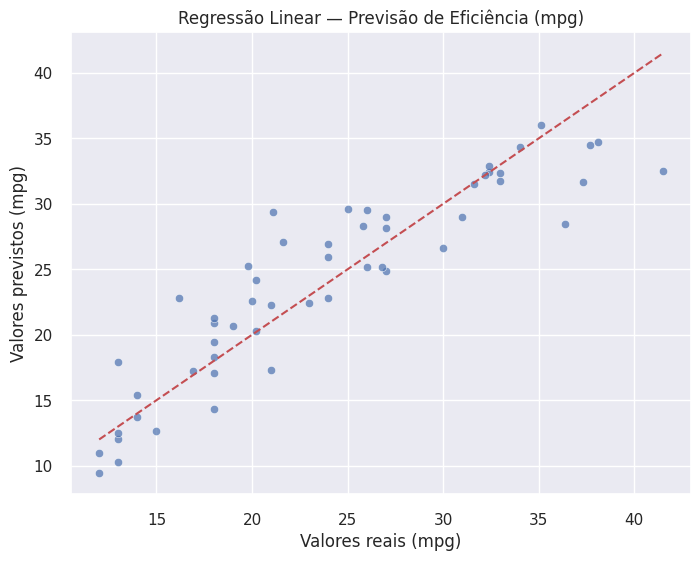

In [9]:
# 6️⃣ Visualização comparativa
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reais (mpg)")
plt.ylabel("Valores previstos (mpg)")
plt.title("Regressão Linear — Previsão de Eficiência (mpg)")
plt.show()


# 🧠 Célula 7 — Importância das variáveis

/tmp/ipython-input-1251821654.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coeficiente', y='Variável', palette='crest')


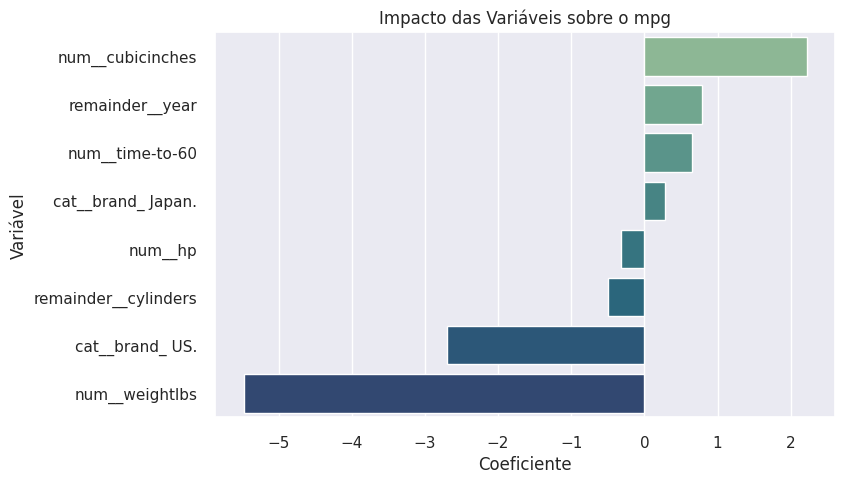

,Variável,Coeficiente
0,num__cubicinches,2.225028
7,remainder__year,0.786286
3,num__time-to-60,0.651360
4,cat__brand_ Japan.,0.275511
1,num__hp,-0.314290
6,remainder__cylinders,-0.493909
5,cat__brand_ US.,-2.701210
2,num__weightlbs,-5.478372


In [10]:
# 7️⃣ Coeficientes do modelo
coef_df = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': model.coef_
}).sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=coef_df, x='Coeficiente', y='Variável', palette='crest')
plt.title("Impacto das Variáveis sobre o mpg")
plt.show()

coef_df.head(10)

# 💾 Célula 8 — Salvando resultados

In [11]:
# 8️⃣ Salvar previsões e métricas
results = pd.DataFrame({'y_real': y_test, 'y_pred': y_pred})
results.to_csv('linear_regression_results.csv', index=False)
print("✅ Resultados salvos como linear_regression_results.csv")

✅ Resultados salvos como linear_regression_results.csv


# 🧩 Célula 9 — Conclusões

In [12]:
# 9️⃣ Conclusões do módulo

print("""
✔️ Modelo de Regressão Linear treinado com sucesso.
✔️ Coluna duplicada 'remainder__mpg' tratada automaticamente.
✔️ Métricas de erro calculadas (MSE, MAE, R²).
✔️ Visualização comparativa entre valores reais e previstos.
✔️ Coeficientes interpretados.
✔️ Dataset utilizado: cars_preprocessed.csv
""")



✔️ Modelo de Regressão Linear treinado com sucesso.
✔️ Coluna duplicada 'remainder__mpg' tratada automaticamente.
✔️ Métricas de erro calculadas (MSE, MAE, R²).
✔️ Visualização comparativa entre valores reais e previstos.
✔️ Coeficientes interpretados.
✔️ Dataset utilizado: cars_preprocessed.csv

